# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import requests

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [4]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Part 1 - Personal Finance Planner

In [5]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Concatenate url and api key
btc_url = btc_url + alpaca_api_key
eth_url = eth_url + alpaca_api_key

In [7]:
# Fetch current BTC
btc_df = requests.get(btc_url)

# Fetch current ETH
eth_df = requests.get(eth_url)

# Confirm data was fetched
btc_df, eth_df

(<Response [200]>, <Response [200]>)

### Compute current value of my crpto

In [8]:
# Convert btc_df to JSON
btc_data=btc_df.json()

# View btc_data using the "dumps" in the "json" function
print(json.dumps(btc_data,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18472318,
            "total_supply": 18472318,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11234.85,
                    "volume_24h": 21678723405,
                    "market_cap": 207533743137,
                    "percentage_change_1h": -0.66345369005846,
                    "percentage_change_24h": -2.01624481177989,
                    "percentage_change_7d": -4.24798405873018,
                    "percent_change_1h": -0.66345369005846,
                    "percent_change_24h": -2.01624481177989,
                    "percent_change_7d": -4.24798405873018
                }
            },
            "last_updated": 1598549273
        }
    },
    "metadata": {
        "timestamp": 1598549273,
        "num_cr

In [9]:
# Convert eth_df to JSON
eth_data=eth_df.json()

# View eth_data using the "dumps" in the "json" function
print(json.dumps(eth_data,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 112355643,
            "total_supply": 112355643,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 376.61,
                    "volume_24h": 10251171223,
                    "market_cap": 42208473685,
                    "percentage_change_1h": -1.74605743124873,
                    "percentage_change_24h": -3.12196676368507,
                    "percentage_change_7d": -7.37040320998601,
                    "percent_change_1h": -1.74605743124873,
                    "percent_change_24h": -3.12196676368507,
                    "percent_change_7d": -7.37040320998601
                }
            },
            "last_updated": 1598549294
        }
    },
    "metadata": {
        "timestamp": 1598549294,
        "num_cr

In [10]:
# Fetch current BTC price
btc_price=btc_data['data']['1']['quotes']['USD']['price']
print(btc_price)

11234.85


In [11]:
# Fetch current ETH price
eth_price=eth_data['data']['1027']['quotes']['USD']['price']
print(eth_price)

376.61


In [33]:
# Compute current value of my crpto
my_btc_value = (my_btc*btc_price)
my_eth_value = (my_eth*eth_price)

# Sum the values of the crypto wallet
sum_crypto_value = my_btc_value + my_eth_value
sum_crypto_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}.")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}.")
print(f"The sum of ETH and BTC is ${sum_crypto_value:0.2f}.")

The current value of your 1.2 BTC is $13481.82.
The current value of your 5.3 ETH is $1996.03.
The sum of ETH and BTC is $15477.85.


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [34]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [35]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-27", tz="America/Chicago").isoformat()
today

'2020-08-27T00:00:00-05:00'

In [36]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
close_price_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

# Display data
close_price_df

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-08-27 00:00:00-04:00  118.55  118.56  117.95  118.055  7385708  348.51   

                                                            
                            high     low   close    volume  
time                                                        
2020-08-27 00:00:00-04:00  349.9  346.53  348.28  67185212

In [37]:
# Pick AGG and SPY close prices
agg_cp = float(close_price_df["AGG"]["close"])
spy_cp = float(close_price_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_cp}")
print(f"Current SPY closing price: ${spy_cp}")

Current AGG closing price: $118.055
Current SPY closing price: $348.28


In [38]:
# Set current amount of shares data
shares_data = {"shares": [my_agg, my_spy]}

# Set the tickers as a list
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
shares_df = pd.DataFrame(shares_data, index=tickers)

# Display shares data
shares_df

,shares
AGG,200
SPY,50


In [39]:
# Compute the current value of shares
agg_value = agg_close_price * shares_df.loc["AGG"]["shares"]
spy_value = spy_close_price * shares_df.loc["SPY"]["shares"]

# Sum current value of total stocks portfolio
sum_shares_value = agg_value + spy_value
sum_shares_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}.")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}.")
print(f"The sum of the SPY and AGG values are ${sum_shares_value:0.2f}.")

The current value of your 50 SPY shares is $17407.00.
The current value of your 200 AGG shares is $23611.88.
The sum of the SPY and AGG values are $41018.88.


### Savings Health Analysis

In [43]:
# Create savings DataFrame
df_assets= {
    "Amount" : [sum_crypto_value,sum_shares_value]}

# Set the index
assets = ["Crypto Wallet", "Stock Shares"]

# Create the shares DataFrame
df_assets = pd.DataFrame(df_assets, index=assets)

# Create the asset value DataFrame
df_savings = pd.DataFrame(df_assets)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto Wallet,15477.853
Stock Shares,41018.880


<AxesSubplot:title={'center':'Savings asset composition'}, ylabel='Amount'>

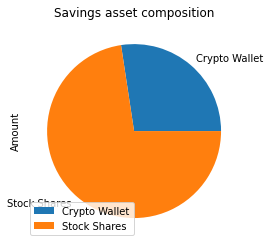

In [44]:
# Plot the savings pie chart
df_savings.plot.pie(y="Amount", title="Savings asset composition")

In [82]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3
print(f"The ideal emergency fund is set to three times the monthly income, and you have ${emergency_fund:0.2f}.")

The ideal emergency fund is set to three times the monthly income, and you have $36000.00.


In [83]:
# Calculate total amount of savings
total_savings = sum_crypto_value + sum_shares_value
print(f"The current value of the crypto assets and stock assets is ${total_savings:0.2f}.")

The current value of the crypto assets and stock assets is $56496.73.


In [84]:
# Calculate difference between total_savings and emergency fund
health_savings = total_savings - emergency_fund
health_savings

20496.733000000007

In [85]:
# Validate savings health
# Compare total savings to emergency fund
if total_savings >= emergency_fund:
    print("Congratulations, you have enough money an emergency fund.")
    print("Congratulations on reaching your financial goal.")
elif total_savings < emergency_fund: 
     print(f"You are ${(health_savings*-1):0.2f} away from reaching the goal of saving three times of your monthly expenses.")

Congratulations, you have enough money an emergency fund.
Congratulations on reaching your financial goal.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [88]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2020-08-27", tz="America/Chicago").isoformat()
end_date = pd.Timestamp("2015-08-27", tz="America/Chicago").isoformat()

In [90]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

Empty DataFrame
Columns: [(AGG, open), (AGG, high), (AGG, low), (AGG, close), (AGG, volume), (SPY, open), (SPY, high), (SPY, low), (SPY, close), (SPY, volume)]
Index: []

In [ ]:
# Get previous 5 year of prices
end_date = pd.Timestamp.now(tz="America/Chicago")
start_date = (end_date - pd.DateOffset(years=5)).isoformat()
print(f"Starting on {start_date} \n"
      f"and going to {end_date}")

In [ ]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
# Printing the simulation input data
MC_weight = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_weight.portfolio_data.tail()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Run a Monte Carlo simulation to forecast 30 years cumulative returns
# Remember to restart kernel.  Changed setting in MCForecastTools.py
# from n%10 == to n%100, so print less simulations
MC_weight.calc_cumulative_return()

In [ ]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_weight.simulated_return.mean(axis=1)),
    "median": list(MC_weight.simulated_return.median(axis=1)),
    "min": list(MC_weight.simulated_return.min(axis=1)),
    "max": list(MC_weight.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.tail()

In [ ]:
# Plot simulation outcomes
line_plot = MC_weight.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_weight.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_weight.summarize_cumulative_return()

# Print summary statistics
print(tbl)

### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(weight_tbl[8]*20000,2)
ci_upper = round(weight_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

In [ ]:
# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.tail()

### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [ ]:
# Set initial investment
initial_investment_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
cumulative_pnl_increase = initial_investment * df_simulated_returns

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

# Optional Challenge - Early Retirement


## Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_five)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")